In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import accuracy_score
import warnings

In [2]:
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)


In [3]:
df = pd.read_csv('./Divar.csv')

In [4]:
df.head()

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,rent_value,rent_to_single,rent_type,price_mode,price_value,credit_mode,credit_value,rent_credit_transform,transformable_price,transformable_credit,transformed_credit,transformable_rent,transformed_rent,land_size,building_size,deed_type,has_business_deed,floor,rooms_count,total_floors_count,unit_per_floor,has_balcony,has_elevator,has_warehouse,has_parking,construction_year,is_rebuilt,has_water,has_warm_water_provider,has_electricity,has_gas,has_heating_system,has_cooling_system,has_restroom,has_security_guard,has_barbecue,building_direction,has_pool,has_jacuzzi,has_sauna,floor_material,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,سه,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,NaN,NaN,NaN,مقطوع,8.500000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,3,یک,NaN,NaN,NaN,True,True,True,۱۳۸۴,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,26000000.0,NaN,NaN,NaN,NaN,مقطوع,750000000.0,False,False,750000000.0,NaN,26000000.0,NaN,NaN,132.0,NaN,NaN,3,سه,NaN,NaN,NaN,True,True,True,۱۴۰۱,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,95000000.0,NaN,NaN,NaN,NaN,مقطوع,950000000.0,False,False,950000000.0,NaN,95000000.0,NaN,NaN,90.0,NaN,NaN,4,یک,NaN,NaN,NaN,True,False,True,۱۴۰۰,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,NaN,NaN,NaN,مقطوع,5.750000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.0,single_page,NaN,4,دو,6,NaN,true,True,True,True,۱۴۰۳,NaN,NaN,package,NaN,NaN,shoofaj,air_conditioner,squat_seat,NaN,NaN,north,NaN,NaN,NaN,ceramic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
to_drop =['Unnamed: 0' , 'rent_to_single', 'regular_person_capacity','extra_person_capacity','cost_per_extra_person', 'rent_price_on_regular_days', 'rent_price_on_special_days' , 'rent_price_at_weekends' ,'has_water' , 'has_electricity' , 'has_gas' , 'has_security_guard','floor_material' ]

In [6]:
df['city_slug'].value_counts()


city_slug
tehran           190904
mashhad           69032
karaj             49367
shiraz            37141
isfahan           36953
                  ...  
goli-dagh             5
maraveh-tapeh         5
khoour                3
yanghagh              2
tatar-olya            1
Name: count, Length: 421, dtype: int64

In [7]:
df[df['land_size']== 'توافقی']['price_value'].value_counts()

Series([], Name: count, dtype: int64)

In [8]:

numeric_features = [
    'price_value', 'building_size', 'land_size', 'rooms_count',
    'floor', 'total_floors_count', 'unit_per_floor', 'construction_year',
    'location_latitude', 'location_longitude'
]

categorical_features = [
    'city_slug', 'neighborhood_slug', 'deed_type',
    'cat2_slug', 'cat3_slug', 'user_type', 'building_direction', 'floor_material'
]

boolean_features = [
    'has_balcony', 'has_elevator', 'has_warehouse', 'has_parking',
    'is_rebuilt', 'has_water', 'has_warm_water_provider', 'has_electricity',
    'has_gas', 'has_heating_system', 'has_cooling_system', 'has_restroom',
    'has_security_guard', 'has_barbecue', 'has_pool', 'has_jacuzzi', 'has_sauna'
]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1000000 non-null  int64  
 1   cat2_slug                   1000000 non-null  object 
 2   cat3_slug                   999999 non-null   object 
 3   city_slug                   999998 non-null   object 
 4   neighborhood_slug           437139 non-null   object 
 5   created_at_month            1000000 non-null  object 
 6   user_type                   288882 non-null   object 
 7   description                 1000000 non-null  object 
 8   title                       999946 non-null   object 
 9   rent_mode                   352994 non-null   object 
 10  rent_value                  351322 non-null   float64
 11  rent_to_single              19 non-null       object 
 12  rent_type                   103961 non-null   object 
 13

In [10]:
cities = df['city_slug'].value_counts()
print()

### Handling missing values in neighborhood_slug

In [11]:
cols = ['location_latitude', 'location_longitude', 'location_radius', 'neighborhood_slug']
df_subset = df[cols]

In [12]:
known = df_subset[df_subset['neighborhood_slug'].notna()]
unknown = df_subset[df_subset['neighborhood_slug'].isna()]

In [13]:
known = known.dropna(subset=['location_latitude', 'location_longitude', 'location_radius'])


In [14]:
counts = known['neighborhood_slug'].value_counts()
valid_neighborhoods = counts[counts >= 2].index
known = known[known['neighborhood_slug'].isin(valid_neighborhoods)]


In [15]:
le = LabelEncoder()
known['neighborhood_encoded'] = le.fit_transform(known['neighborhood_slug'])

In [16]:
X = known[['location_latitude', 'location_longitude', 'location_radius']]
y = known['neighborhood_encoded']


In [17]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
k = 5  
knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [19]:
y_pred_val = knn.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_val)
print(f"KNN Accuracy for neighborhood prediction: {accuracy:.2%}")


KNN Accuracy for neighborhood prediction: 85.20%


In [20]:
X_test = unknown[['location_latitude', 'location_longitude', 'location_radius']].dropna()


In [21]:
y_pred_test = knn.predict(X_test)
predicted_labels = le.inverse_transform(y_pred_test)

In [22]:
df.loc[X_test.index, 'neighborhood_slug'] = predicted_labels

print(f"Filled {len(X_test)} missing neighborhood_slug values.")

Filled 117692 missing neighborhood_slug values.


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1000000 non-null  int64  
 1   cat2_slug                   1000000 non-null  object 
 2   cat3_slug                   999999 non-null   object 
 3   city_slug                   999998 non-null   object 
 4   neighborhood_slug           554831 non-null   object 
 5   created_at_month            1000000 non-null  object 
 6   user_type                   288882 non-null   object 
 7   description                 1000000 non-null  object 
 8   title                       999946 non-null   object 
 9   rent_mode                   352994 non-null   object 
 10  rent_value                  351322 non-null   float64
 11  rent_to_single              19 non-null       object 
 12  rent_type                   103961 non-null   object 
 13

## Drop Unnecessery columns 

In [24]:
df2 = df.copy()

In [25]:
df.drop(to_drop, axis = 1 , inplace = True )
df.columns

Index(['cat2_slug', 'cat3_slug', 'city_slug', 'neighborhood_slug',
       'created_at_month', 'user_type', 'description', 'title', 'rent_mode',
       'rent_value', 'rent_type', 'price_mode', 'price_value', 'credit_mode',
       'credit_value', 'rent_credit_transform', 'transformable_price',
       'transformable_credit', 'transformed_credit', 'transformable_rent',
       'transformed_rent', 'land_size', 'building_size', 'deed_type',
       'has_business_deed', 'floor', 'rooms_count', 'total_floors_count',
       'unit_per_floor', 'has_balcony', 'has_elevator', 'has_warehouse',
       'has_parking', 'construction_year', 'is_rebuilt',
       'has_warm_water_provider', 'has_heating_system', 'has_cooling_system',
       'has_restroom', 'has_barbecue', 'building_direction', 'has_pool',
       'has_jacuzzi', 'has_sauna', 'property_type', 'location_latitude',
       'location_longitude', 'location_radius'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cat2_slug                1000000 non-null  object 
 1   cat3_slug                999999 non-null   object 
 2   city_slug                999998 non-null   object 
 3   neighborhood_slug        554831 non-null   object 
 4   created_at_month         1000000 non-null  object 
 5   user_type                288882 non-null   object 
 6   description              1000000 non-null  object 
 7   title                    999946 non-null   object 
 8   rent_mode                352994 non-null   object 
 9   rent_value               351322 non-null   float64
 10  rent_type                103961 non-null   object 
 11  price_mode               573606 non-null   object 
 12  price_value              568346 non-null   float64
 13  credit_mode              352994 non-null   

## Rent columns

In [28]:
df['rent_mode'].value_counts()

rent_mode
مقطوع     292081
مجانی      59241
توافقی      1672
Name: count, dtype: int64

In [29]:
df['rent_value'].value_counts().sort_values()

rent_value
12345000.0        1
1111444.0         1
22222220.0        1
3440000.0         1
58855555.0        1
              ...  
6000000.0     14490
3000000.0     16873
5000000.0     17475
100000.0      24734
0.0           59241
Name: count, Length: 1311, dtype: int64

###### Free properties  == its 0 values

In [30]:
df['rent_type'].value_counts().sort_values()

rent_type
full_credit       147
rent_credit    103814
Name: count, dtype: int64

In [31]:
df[(df['rent_mode'].notna() & df['rent_type'].isna()) | (df['rent_type'].notna() & df['rent_mode'].isna())]


,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,rent_value,rent_type,price_mode,price_value,credit_mode,credit_value,rent_credit_transform,transformable_price,transformable_credit,transformed_credit,transformable_rent,transformed_rent,land_size,building_size,deed_type,has_business_deed,floor,rooms_count,total_floors_count,unit_per_floor,has_balcony,has_elevator,has_warehouse,has_parking,construction_year,is_rebuilt,has_warm_water_provider,has_heating_system,has_cooling_system,has_restroom,has_barbecue,building_direction,has_pool,has_jacuzzi,has_sauna,property_type,location_latitude,location_longitude,location_radius
2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,26000000.0,NaN,NaN,NaN,مقطوع,7.500000e+08,False,False,7.500000e+08,NaN,26000000.0,NaN,NaN,132.0,NaN,NaN,3,سه,NaN,NaN,NaN,True,True,True,۱۴۰۱,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,95000000.0,NaN,NaN,NaN,مقطوع,9.500000e+08,False,False,9.500000e+08,NaN,95000000.0,NaN,NaN,90.0,NaN,NaN,4,یک,NaN,NaN,NaN,True,False,True,۱۴۰۰,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,residential-rent,apartment-rent,ahvaz,mellirah,2024-09-01 00:00:00,NaN,اپارتمان ۱۰۰متری واحد جلو دارای دو اتاق خواب ک...,اپارتمان ۱۰۰متری ملی راه واحد جلو,مقطوع,6000000.0,NaN,NaN,NaN,مقطوع,2.500000e+08,False,True,2.500000e+08,400000000.0,6000000.0,1.0,NaN,100.0,NaN,NaN,3,دو,3,2,true,False,True,True,۱۳۸۹,False,water_heater,NaN,NaN,squat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,commercial-rent,office-rent,kermanshah,NaN,2024-11-01 00:00:00,NaN,♦مشاورین املاک سیب♦\n✅️کد:G۱۰۵\n♦با سالها سابق...,واحداداری ۸۰متری ۲۲بهمن(برق),مقطوع,16000000.0,NaN,NaN,NaN,مقطوع,1.500000e+08,False,False,1.500000e+08,NaN,16000000.0,NaN,NaN,80.0,NaN,NaN,2,دو,NaN,NaN,NaN,True,False,False,۱۳۹۵,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,residential-rent,apartment-rent,karaj,gohardasht,2024-08-01 00:00:00,NaN,"۱۵۵ متر ۳ خواب ۱ خواب مستر\n\nآشپزخانه:مدرن,هو...",۱۵۵ متر نوساز فول امکانات,مقطوع,100000.0,NaN,NaN,NaN,مقطوع,1.000000e+09,False,False,1.000000e+09,NaN,100000.0,NaN,NaN,155.0,NaN,NaN,3,سه,NaN,NaN,NaN,True,True,True,۱۴۰۲,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999979,residential-rent,apartment-rent,nurabad,NaN,2024-11-01 00:00:00,NaN,اپارتمان ۱۴۰متری دوخوابه کف سرامیک طبقه ۴دارای...,یک اپارتمان دوخوابه درخیابان اصلی نوراباد,مجانی,0.0,NaN,NaN,NaN,مقطوع,2.500000e+08,False,False,2.500000e+08,NaN,0.0,NaN,NaN,140.0,NaN,NaN,4.0,دو,7.0,5,True,True,True,False,۱۳۹۰,False,water_heater,NaN,NaN,squat,NaN,north,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999981,residential-rent,house-villa-rent,mashhad,khaje-rabi,2024-08-01 00:00:00,NaN,منزل ویلایی دربست به متراژتقریبی 65متریه خوابه...,ویلایی 65متری یه خواب,مقطوع,100000.0,NaN,NaN,NaN,مقطوع,1.300000e+08,False,False,1.300000e+08,NaN,100000.0,NaN,65.0,65.0,NaN,NaN,NaN,یک,NaN,NaN,True,NaN,True,False,۱۳۸۷,False,water_heater,heater,NaN,squat,NaN,north,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999984,commercial-rent,shop-rent,qarchak-city,NaN,2024-08-01 00:00:00,NaN,مغازه تجاری بهر بلوار باقرآباد\nهمکف دارای کلی...,بهر بلوار باقرآباد ۲۰۰ متر تجاری همکف,مقطوع,111111.0,NaN,NaN,NaN,مجانی,0.000000e+00,False,False,0.000000e+00,NaN,111111.0,NaN,NaN,200.0,NaN,NaN,NaN,یک,NaN,NaN,NaN,NaN,NaN,NaN,۱۳۷۲,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999985,commercial-rent,shop-rent,parand-city,NaN,2024-07-01 00:00:00,NaN,رهن و اجاره مغازه 15 متری واقع در کوزو 5 خ اما...,رهن و اجاره مغازه 15 متری,مقطوع,100000.0,NaN,NaN,NaN,مقطوع,2.200000e+08,False,False,2.200000e+08,NaN,100000.0,NaN,NaN

In [32]:
df['has_balcony'].value_counts().sort_values()

has_balcony
unselect       223
False         4545
True         20692
false        88855
true        392096
Name: count, dtype: int64

In [33]:
df['has_balcony'] = df['has_balcony'].map({'false': 'False', 'true': 'True', 'unselect': np.nan })
df['has_balcony'].value_counts().sort_values()

has_balcony
False     88855
True     392096
Name: count, dtype: int64

In [34]:
df['has_elevator'].value_counts().sort_values()

has_elevator
False    176601
True     365148
Name: count, dtype: int64

In [35]:
df['has_warehouse'].value_counts().sort_values()

has_warehouse
False    145842
True     582313
Name: count, dtype: int64

In [36]:
df['has_parking'].value_counts().sort_values()

has_parking
False    175614
True     552542
Name: count, dtype: int64

In [37]:
df['building_direction'].value_counts()

building_direction
south       159453
north       142009
east         12111
west          7143
unselect      3207
Name: count, dtype: int64

In [38]:
df2 = df.copy()

In [39]:
df = df2.copy()

In [40]:
df.loc[df['building_direction'] == 'unselect', 'building_direction'] = np.nan


In [41]:
df['building_direction'].value_counts()

building_direction
south    159453
north    142009
east      12111
west       7143
Name: count, dtype: int64

In [42]:
df['construction_year'].value_counts()

construction_year
۱۴۰۳           116260
۱۳۹۰            59139
۱۴۰۲            58424
۱۴۰۰            53674
۱۳۹۵            53029
۱۳۹۸            38207
۱۳۹۷            36326
۱۳۹۶            35487
۱۴۰۱            35328
۱۳۸۵            34065
۱۳۹۹            29594
۱۳۹۳            29094
۱۳۹۲            26130
۱۳۹۴            26110
۱۳۸۸            24268
۱۳۸۰            23480
قبل از ۱۳۷۰     20637
۱۳۸۹            16755
۱۳۹۱            16316
۱۳۸۷            14136
۱۳۸۶            13468
۱۳۸۳             9894
۱۳۸۴             8494
۱۳۷۵             7247
۱۳۸۲             6965
۱۳۷۱             5531
۱۳۸۱             3590
۱۳۷۸             3025
۱۳۷۹             2415
۱۳۷۷             2117
۱۳۷۲             1914
۱۳۷۳             1827
۱۳۷۶             1593
۱۳۷۴             1289
Name: count, dtype: int64

In [43]:
persian_to_english_map = str.maketrans('۰۱۲۳۴۵۶۷۸۹', '0123456789')

df['construction_year'] = (
    df['construction_year']
    .astype(str)
    .apply(lambda x: x.translate(persian_to_english_map) if isinstance(x, str) else x)
    .str.extract(r'(\d+)', expand=False)   # Extract only digits
)

# Convert to numeric, coercing errors to NaN
df['construction_year'] = pd.to_numeric(df['construction_year'], errors='coerce')

# Check result
print(df['construction_year'].sort_values().unique())

[1370. 1371. 1372. 1373. 1374. 1375. 1376. 1377. 1378. 1379. 1380. 1381.
 1382. 1383. 1384. 1385. 1386. 1387. 1388. 1389. 1390. 1391. 1392. 1393.
 1394. 1395. 1396. 1397. 1398. 1399. 1400. 1401. 1402. 1403.   nan]


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 49 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cat2_slug                1000000 non-null  object 
 1   cat3_slug                999999 non-null   object 
 2   city_slug                999998 non-null   object 
 3   neighborhood_slug        554831 non-null   object 
 4   created_at_month         1000000 non-null  object 
 5   user_type                288882 non-null   object 
 6   description              1000000 non-null  object 
 7   title                    999946 non-null   object 
 8   rent_mode                352994 non-null   object 
 9   rent_value               351322 non-null   float64
 10  rent_type                103961 non-null   object 
 11  price_mode               573606 non-null   object 
 12  price_value              568346 non-null   float64
 13  credit_mode              352994 non-null   

### Pool and Jacuzzi

In [45]:
df['combined_text'] = df[['title', 'description']].fillna('').agg(' '.join, axis=1)


In [46]:
mask = df['combined_text'].str.contains('استخر', case=False, na=False)


In [47]:
df.loc[mask, 'has_pool'] = True

In [48]:
df['has_pool'] = df['has_pool'].fillna(False)

In [50]:
mask = df['combined_text'].str.contains('جکوزی', case=False, na=False)
df.loc[mask, 'has_jacuzzi'] = True
df['has_jacuzzi'] = df['has_jacuzzi'].fillna(False)

In [55]:
mask = df['combined_text'].str.contains('سونا', case=False, na=False)
df.loc[mask, 'has_sauna'] = True
df['has_sauna'] = df['has_sauna'].fillna(False)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 49 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cat2_slug                1000000 non-null  object 
 1   cat3_slug                999999 non-null   object 
 2   city_slug                999998 non-null   object 
 3   neighborhood_slug        554831 non-null   object 
 4   created_at_month         1000000 non-null  object 
 5   user_type                288882 non-null   object 
 6   description              1000000 non-null  object 
 7   title                    999946 non-null   object 
 8   rent_mode                352994 non-null   object 
 9   rent_value               351322 non-null   float64
 10  rent_type                103961 non-null   object 
 11  price_mode               573606 non-null   object 
 12  price_value              568346 non-null   float64
 13  credit_mode              352994 non-null   

In [57]:
df2 = df.copy()

### Drop Other Unnecessary Columns


In [59]:
df.drop(['location_radius', 'location_longitude','location_latitude','description','title'] , axis =1 , inplace =True)

In [61]:
df.drop(['has_barbecue', 'has_restroom','has_cooling_system','has_heating_system','has_warm_water_provider','has_business_deed','user_type'] , axis =1 , inplace =True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 37 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   cat2_slug              1000000 non-null  object 
 1   cat3_slug              999999 non-null   object 
 2   city_slug              999998 non-null   object 
 3   neighborhood_slug      554831 non-null   object 
 4   created_at_month       1000000 non-null  object 
 5   rent_mode              352994 non-null   object 
 6   rent_value             351322 non-null   float64
 7   rent_type              103961 non-null   object 
 8   price_mode             573606 non-null   object 
 9   price_value            568346 non-null   float64
 10  credit_mode            352994 non-null   object 
 11  credit_value           352095 non-null   float64
 12  rent_credit_transform  352985 non-null   object 
 13  transformable_price    352894 non-null   object 
 14  transformable_credi

In [67]:
df.columns
for _ in df.columns:
    #df[_]=df[_].replace("unselect", np.nan)
    print(_ ,df[_].unique())

cat2_slug ['temporary-rent' 'residential-sell' 'residential-rent' 'commercial-rent'
 'commercial-sell' 'real-estate-services']
cat3_slug ['villa' 'apartment-sell' 'apartment-rent' 'office-rent' 'shop-sell'
 'plot-old' 'house-villa-sell' 'house-villa-rent' 'shop-rent'
 'industry-agriculture-business-rent' 'office-sell'
 'industry-agriculture-business-sell' 'presell' 'suite-apartment'
 'partnership' 'workspace' nan]
city_slug ['karaj' 'tehran' 'mashhad' 'ahvaz' 'kermanshah' 'mahdasht-city'
 'pardis-city' 'foolad-shahr' 'rasht' 'mahabad' 'shiraz' 'gonabad' 'azna'
 'andisheh-new-town' 'chamestan' 'babol' 'arak' 'pishva' 'tabriz' 'urmia'
 'nur' 'kish' 'nasimshahr' 'amol' 'yasuj' 'isfahan' 'ilam' 'najafabad'
 'yazd' 'pakdasht-city' 'bandar-ganaveh' 'chalus' 'sabzevar' 'eslamshahr'
 'dezful' 'mohammadieh' 'lavasan-city' 'sirjan' 'Kordkuy' 'hamedan'
 'qods-city' 'shandiz-city' 'mahmudabad' 'aran-va-bidgol' 'bandar-abbas'
 'bandar-kangan' 'kiashahr' 'izadshahr' 'bushehr' 'tuyserkan'
 'khoram-ab

In [89]:
Numerical = ['rent_value','price_value','credit_value','floor','rooms_count','total_floors_count','unit_per_floor','construction_year']

In [90]:
Bools =['rent_credit_transform','transformable_price','has_balcony','has_elevator','has_warehouse','has_parking','is_rebuilt']

In [70]:
df['rooms_count'] = df['rooms_count'].replace({
    'پنج یا بیشتر': 5,
    'چهار': 4,
    'سه': 3,
    'یک': 1,
    'دو': 2,
    'بدون اتاق': 0
})


In [71]:
df['rooms_count'].unique()

array([ 3.,  1.,  2.,  0., nan,  4.,  5.])

In [73]:
df['unit_per_floor'] = df['unit_per_floor'].replace({'more_than_8': 9})
df['unit_per_floor'].unique()

array([nan, '2', '4', '1', '3', '5', '6', '8', 9, '7'], dtype=object)

In [81]:
df['floor'] = df['floor'].replace({'30+': 30})
df['floor'].unique()

array([nan, '3', '4', '2', '1', '5', '0', '30', '6', '7', '8', '18', '12',
       '11', '10', '-1', '13', '9', '19', '16', 30, '21', '15', '22',
       '14', '17', '20', '23', '25', '24', '26', '28', '29', '27', 3.0,
       2.0, 4.0, 1.0, 0.0, 20.0, 5.0, 7.0, 6.0, 18.0, 8.0, -1.0, 22.0,
       10.0, 14.0, 9.0, 11.0], dtype=object)

In [86]:
df['total_floors_count'] = df['total_floors_count'].replace({'30+': 30})
df['total_floors_count'].unique()

array([nan, '6', '3', '14', '5', '4', '2', '7', '8', '10', '11', '12',
       '17', '9', '25', '18', '19', '15', '16', '21', '20', '22', '13',
       '24', 30, '29', '26', '30', '27', '23', '28', 4.0, 5.0, 6.0, 2.0,
       3.0, 14.0, 25.0, 8.0, 7.0, 20.0, 11.0, 10.0, 12.0, 13.0, 21.0,
       19.0], dtype=object)

### Turning numerical categories to float

In [87]:
for i in Numerical:
    df[i] = df[i].astype(float)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 37 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   cat2_slug              1000000 non-null  object 
 1   cat3_slug              999999 non-null   object 
 2   city_slug              999998 non-null   object 
 3   neighborhood_slug      554831 non-null   object 
 4   created_at_month       1000000 non-null  object 
 5   rent_mode              352994 non-null   object 
 6   rent_value             351322 non-null   float64
 7   rent_type              103961 non-null   object 
 8   price_mode             573606 non-null   object 
 9   price_value            568346 non-null   float64
 10  credit_mode            352994 non-null   object 
 11  credit_value           352095 non-null   float64
 12  rent_credit_transform  352985 non-null   object 
 13  transformable_price    352894 non-null   object 
 14  transformable_credi

### Turning Boolean categories to bool

In [91]:
for i in Bools:
    df[i] = df[i].astype(bool)

In [93]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 37 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   cat2_slug              1000000 non-null  object 
 1   cat3_slug              999999 non-null   object 
 2   city_slug              999998 non-null   object 
 3   neighborhood_slug      554831 non-null   object 
 4   created_at_month       1000000 non-null  object 
 5   rent_mode              352994 non-null   object 
 6   rent_value             351322 non-null   float64
 7   rent_type              103961 non-null   object 
 8   price_mode             573606 non-null   object 
 9   price_value            568346 non-null   float64
 10  credit_mode            352994 non-null   object 
 11  credit_value           352095 non-null   float64
 12  rent_credit_transform  1000000 non-null  bool   
 13  transformable_price    1000000 non-null  bool   
 14  transformable_credi

In [95]:
df['created_at_month'] = pd.to_datetime(df['created_at_month'])


### Categorical Columns

In [97]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [98]:
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)  
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

In [99]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 37 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   cat2_slug              1000000 non-null  int64         
 1   cat3_slug              1000000 non-null  int64         
 2   city_slug              1000000 non-null  int64         
 3   neighborhood_slug      1000000 non-null  int64         
 4   created_at_month       1000000 non-null  datetime64[ns]
 5   rent_mode              1000000 non-null  int64         
 6   rent_value             351322 non-null   float64       
 7   rent_type              1000000 non-null  int64         
 8   price_mode             1000000 non-null  int64         
 9   price_value            568346 non-null   float64       
 10  credit_mode            1000000 non-null  int64         
 11  credit_value           352095 non-null   float64       
 12  rent_credit_transform  100000

In [101]:
df.drop(columns={'property_type','combined_text'}, inplace= True)

### Filling Nan

In [108]:
df_new = df['created_at_month']

In [109]:
df3= df.copy()

In [110]:
df.drop(['created_at_month'] , axis= 1, inplace=True)

In [122]:
target_columns = [
    'credit_value'
]

In [123]:
features = df.drop(columns=target_columns)


In [124]:
features = pd.get_dummies(features, drop_first=True)


In [125]:
def fill_missing_column(df, col, features):
    print(f"\nProcessing column: {col}")
    y = df[col]
    X = features

    # Split into rows with and without target
    not_null_mask = y.notna()
    X_train = X[not_null_mask]
    y_train = y[not_null_mask]
    X_test = X[~not_null_mask]

    if X_train.empty or X_test.empty:
        print(f"Skipping {col} (no missing or no training data)")
        return df

    # Determine task type
    if y_train.dtype.kind in 'biufc':  # numeric
        task = 'regression'
        model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    else:
        task = 'classification'
        model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    # Split for validation
    X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Train model
    model.fit(X_tr, y_tr)

    # Predict on validation
    y_pred_val = model.predict(X_val)

    if task == 'regression':
        mae = mean_absolute_error(y_val, y_pred_val)
        mean_val = y_train.mean()
        median_val = y_train.median()
        mae_mean = mean_absolute_error(y_val, [mean_val]*len(y_val))
        mae_median = mean_absolute_error(y_val, [median_val]*len(y_val))

        print(f"MAE (model): {mae:.2f}")
        print(f"MAE (mean): {mae_mean:.2f}")
        print(f"MAE (median): {mae_median:.2f}")

        if mae < min(mae_mean, mae_median):
            print(f"Model is better → filling missing {col} with predictions")
            df.loc[~not_null_mask, col] = model.predict(X_test)
        else:
            fill_value = mean_val if mae_mean < mae_median else median_val
            print(f"Model not better → filling missing {col} with {'mean' if fill_value==mean_val else 'median'}")
            df[col] = df[col].fillna(fill_value)

    else:  # classification
        acc = accuracy_score(y_val, y_pred_val)
        mode_val = y_train.mode()[0]
        acc_mode = accuracy_score(y_val, [mode_val]*len(y_val))

        print(f"Accuracy (model): {acc:.2f}")
        print(f"Accuracy (mode): {acc_mode:.2f}")

        if acc > acc_mode:
            print(f"Model is better → filling missing {col} with predictions")
            df.loc[~not_null_mask, col] = model.predict(X_test)
        else:
            print(f"Model not better → filling missing {col} with mode")
            df[col] = df[col].fillna(mode_val)

    return df

In [126]:
for col in target_columns:
    df = fill_missing_column(df, col, features)



Processing column: credit_value
MAE (model): 1533687215.52
MAE (mean): 86905758875.93
MAE (median): 39227430145.21
Model is better → filling missing credit_value with predictions


In [127]:
df.to_csv("filled_dataset.csv", index=False)

### Handling Outliers


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   cat2_slug              1000000 non-null  int64  
 1   cat3_slug              1000000 non-null  int64  
 2   city_slug              1000000 non-null  int64  
 3   neighborhood_slug      1000000 non-null  int64  
 4   rent_mode              1000000 non-null  int64  
 5   rent_value             1000000 non-null  float64
 6   rent_type              1000000 non-null  int64  
 7   price_mode             1000000 non-null  int64  
 8   price_value            1000000 non-null  float64
 9   credit_mode            1000000 non-null  int64  
 10  credit_value           1000000 non-null  float64
 11  rent_credit_transform  1000000 non-null  bool   
 12  transformable_price    1000000 non-null  bool   
 13  transformable_credit   352085 non-null   float64
 14  transformed_credit 

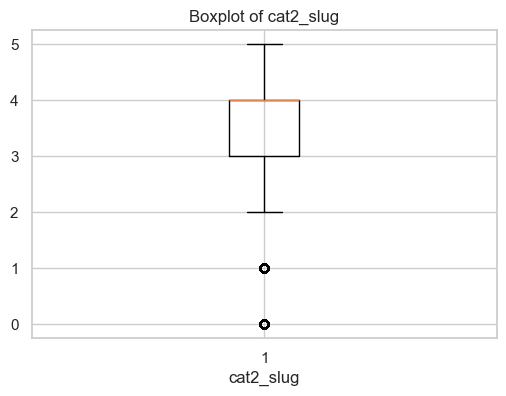

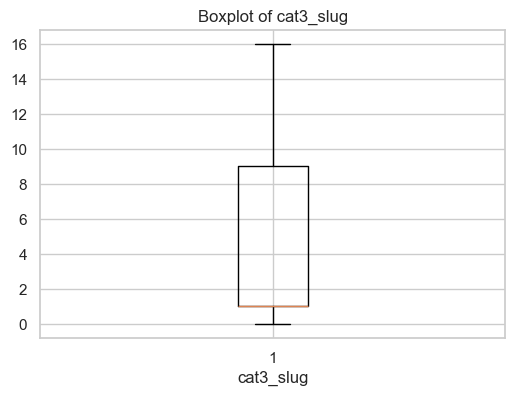

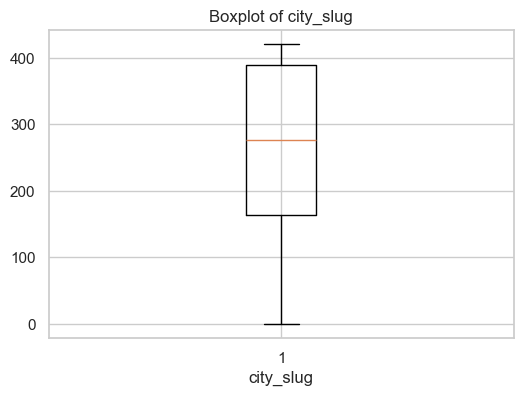

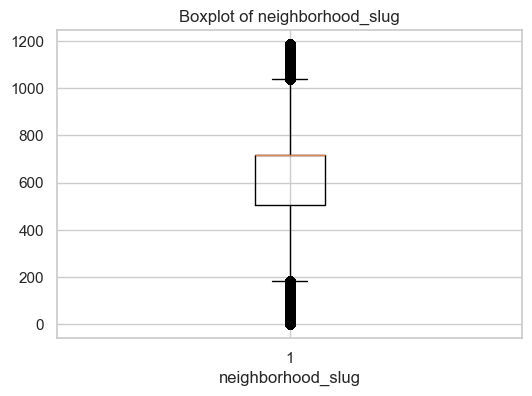

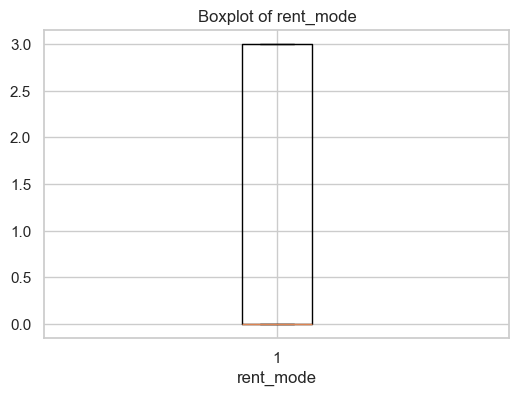

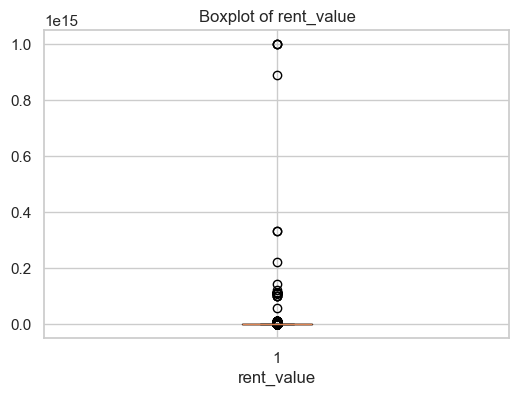

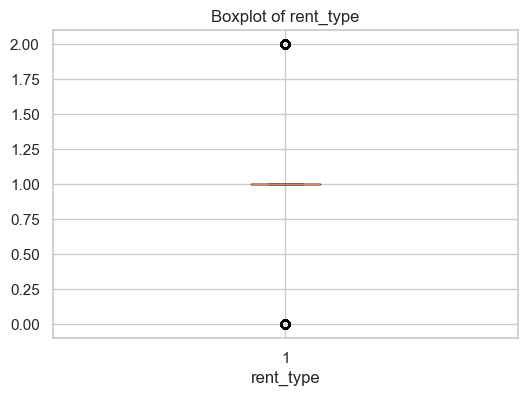

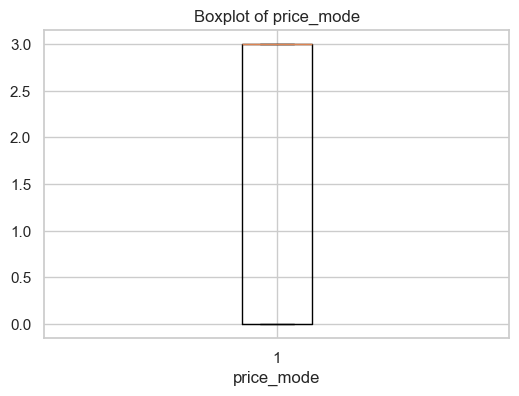

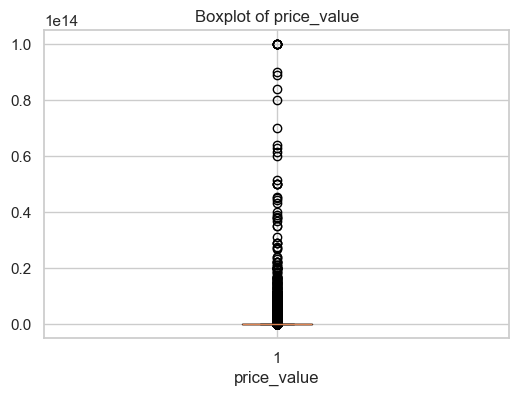

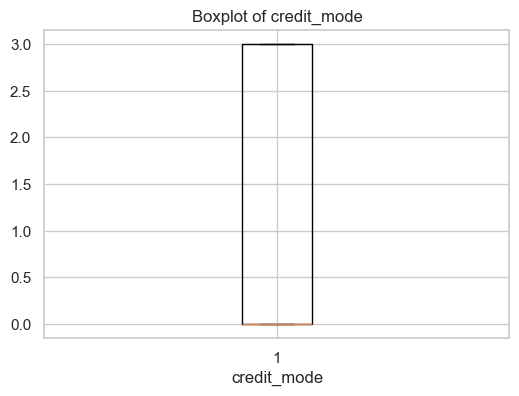

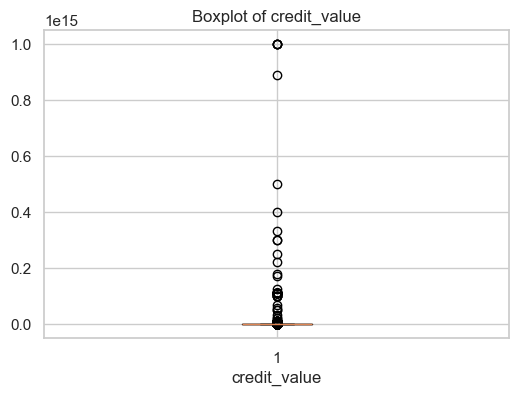

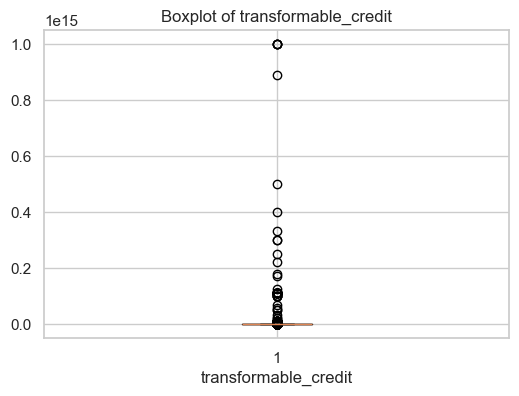

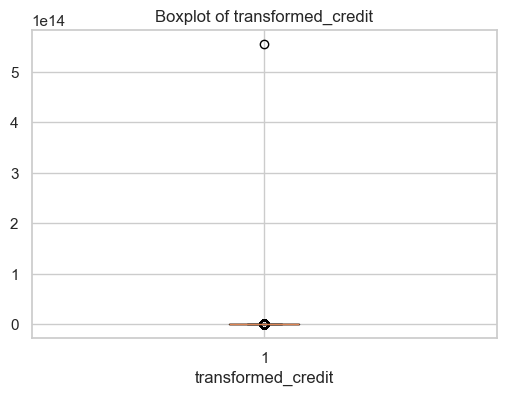

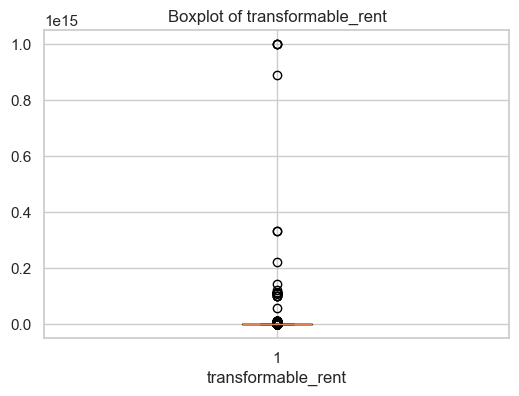

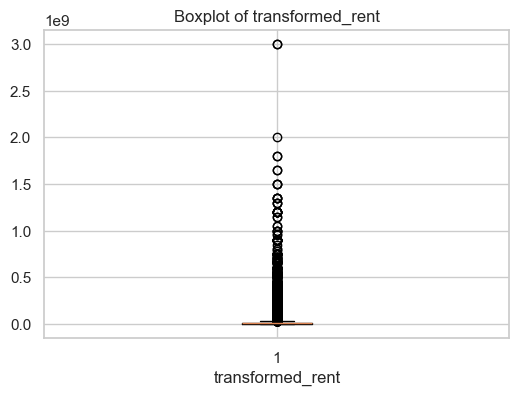

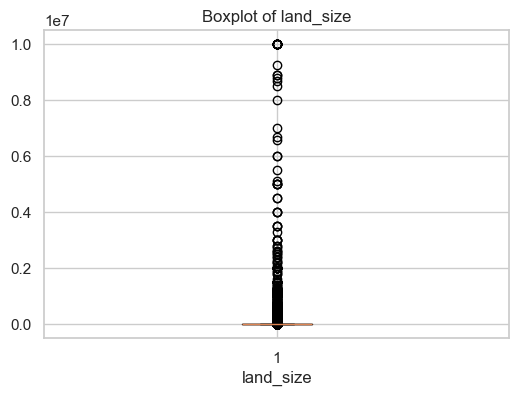

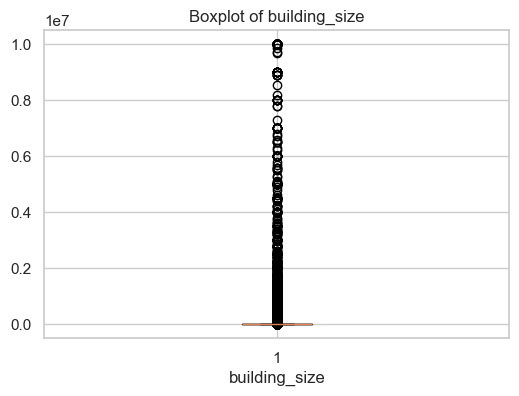

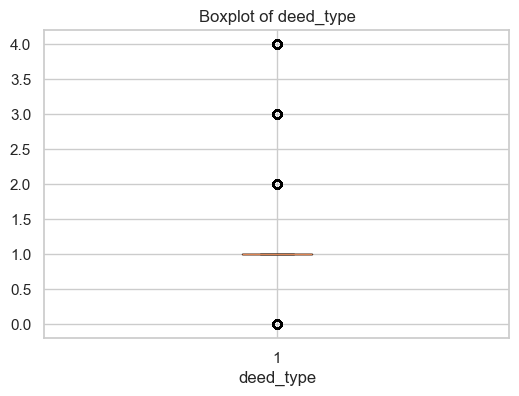

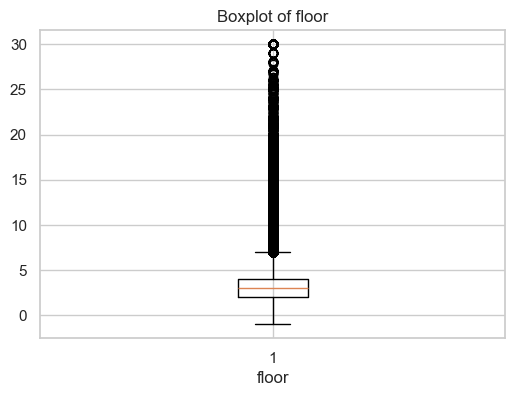

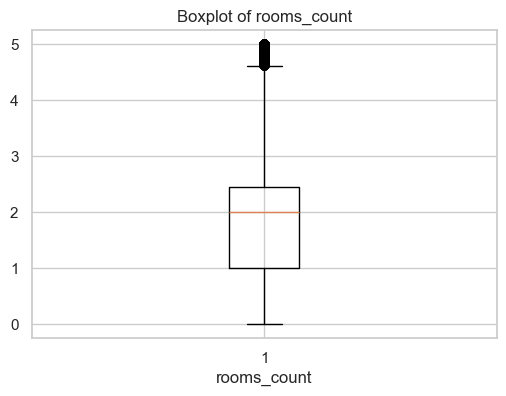

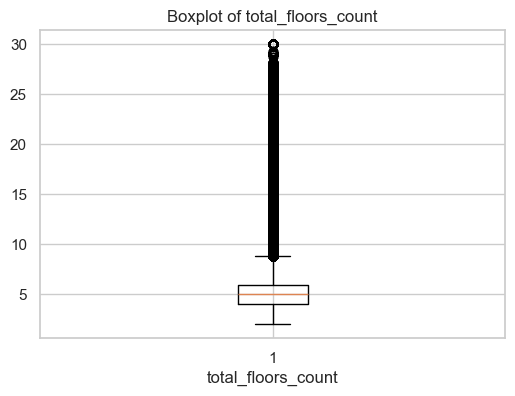

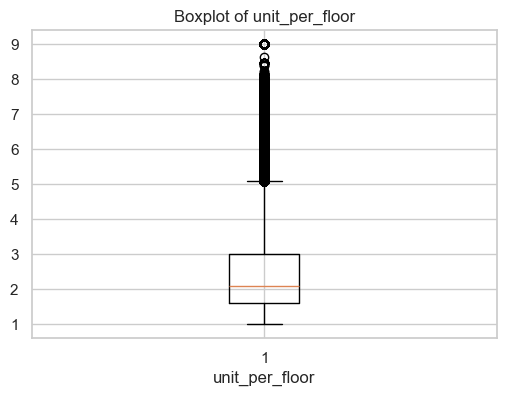

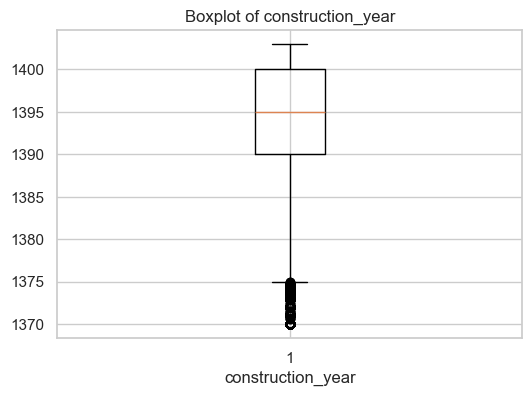

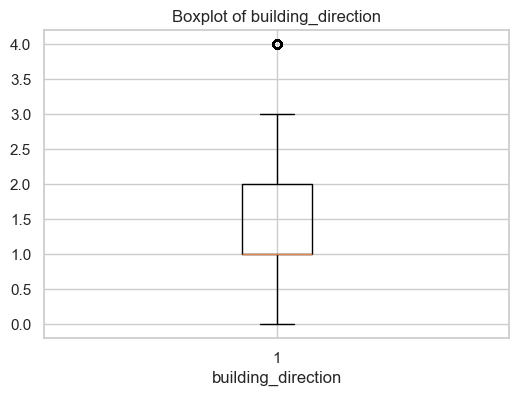

In [121]:
numeric_cols = df.select_dtypes(include=["number"]).columns

# Plot each column separately
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()